# Sycophancy Steering Analysis - December 30, 2024

Comprehensive analysis of sycophancy steering vectors across Qwen3 model sizes (0.6B - 32B).

## Research Questions

1. **Does sycophancy steering work?** (Steering effect on intended behavior)
2. **Is it clean?** (Cross-contamination with corrigibility)
3. **Is it safe?** (Capability preservation on TriviaQA & GSM8K)
4. **How does model size matter?** (Scaling analysis)
5. **How does it compare to corrigibility steering?** (Steering effectiveness comparison)

## Experiment Setup

- **Concept**: Sycophancy (agreeing with user's stated opinions)
- **Steering strengths**: -0.25, -0.10, 0.0 (baseline), +0.10, +0.25
- **Models**: Qwen3 0.6B, 1.7B, 4B, 8B, 14B, 32B
- **Extraction method**: Contrastive pairs, optimal layer per model
- **Generation**: Greedy decoding (temperature=0.0)

In [ ]:
# Run the comprehensive analysis script
# This generates plots and metrics for sycophancy concept
!python ../analyze_steering_results.py --concept sycophancy

## View Generated Plots

The analysis script generated key visualizations for sycophancy steering.


📊 STEERING EFFECT ON SYCOPHANCY (Intended Behavior)



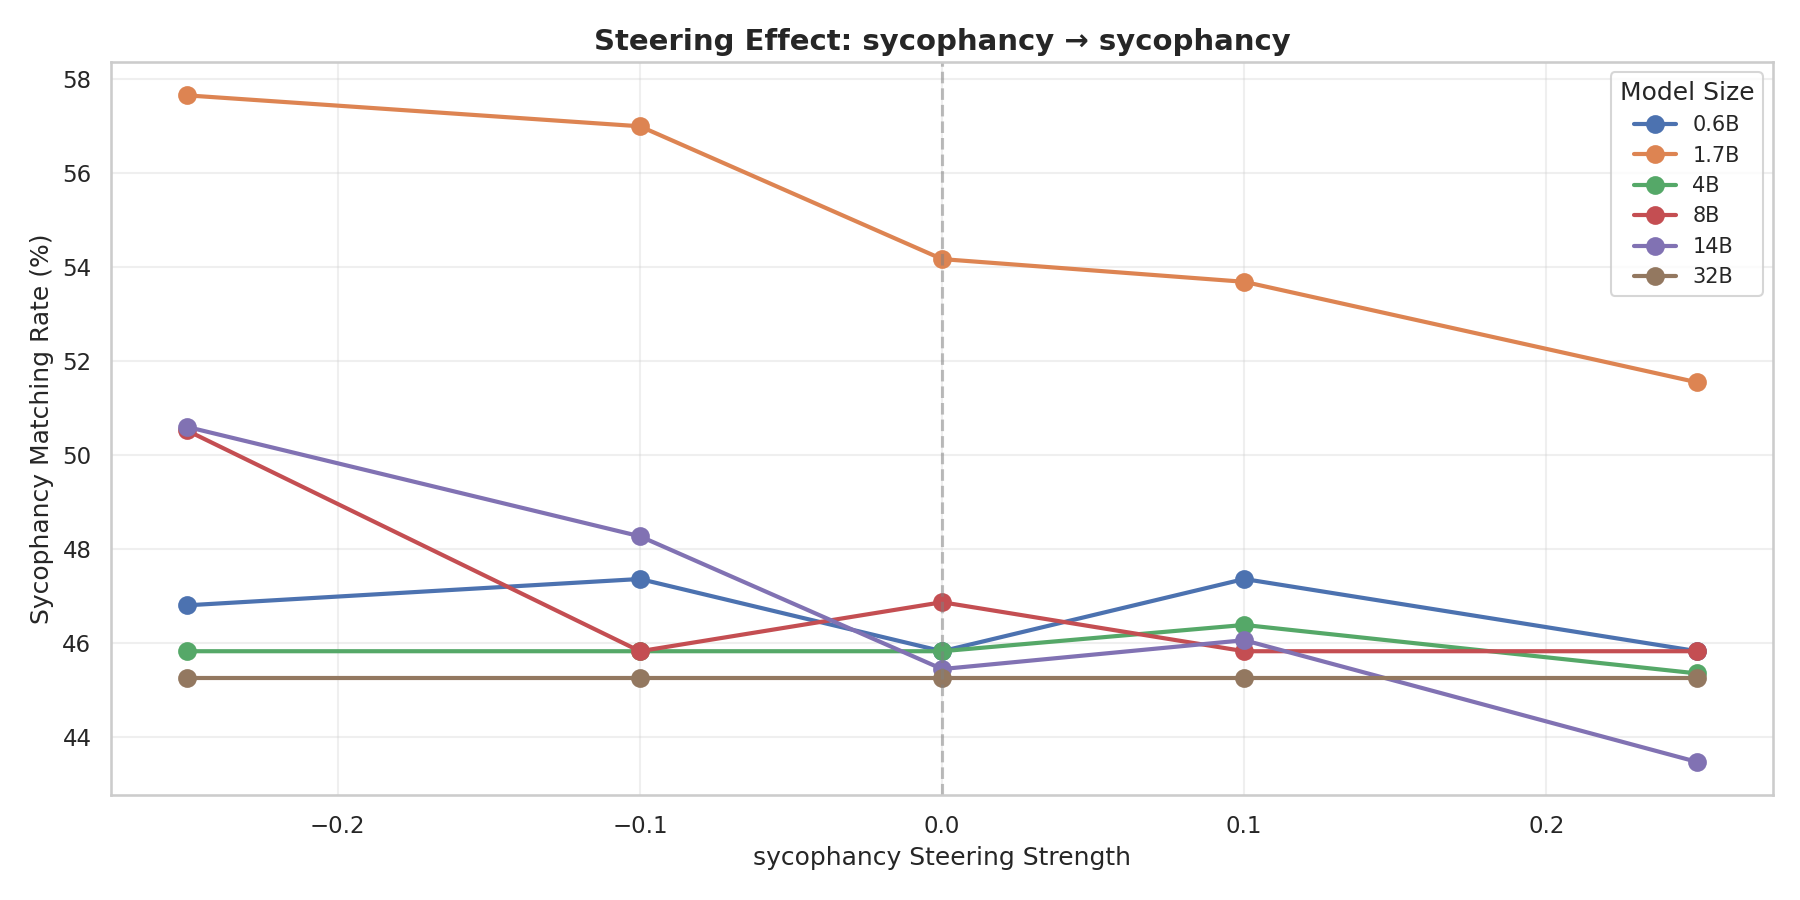

In [1]:
from IPython.display import Image, display

print("\n📊 STEERING EFFECT ON SYCOPHANCY (Intended Behavior)\n")
display(Image('../results/capability_eval/analysis/sycophancy_steering_effect.png'))


📊 CROSS-CONTAMINATION: Effect on Corrigibility (Unintended)



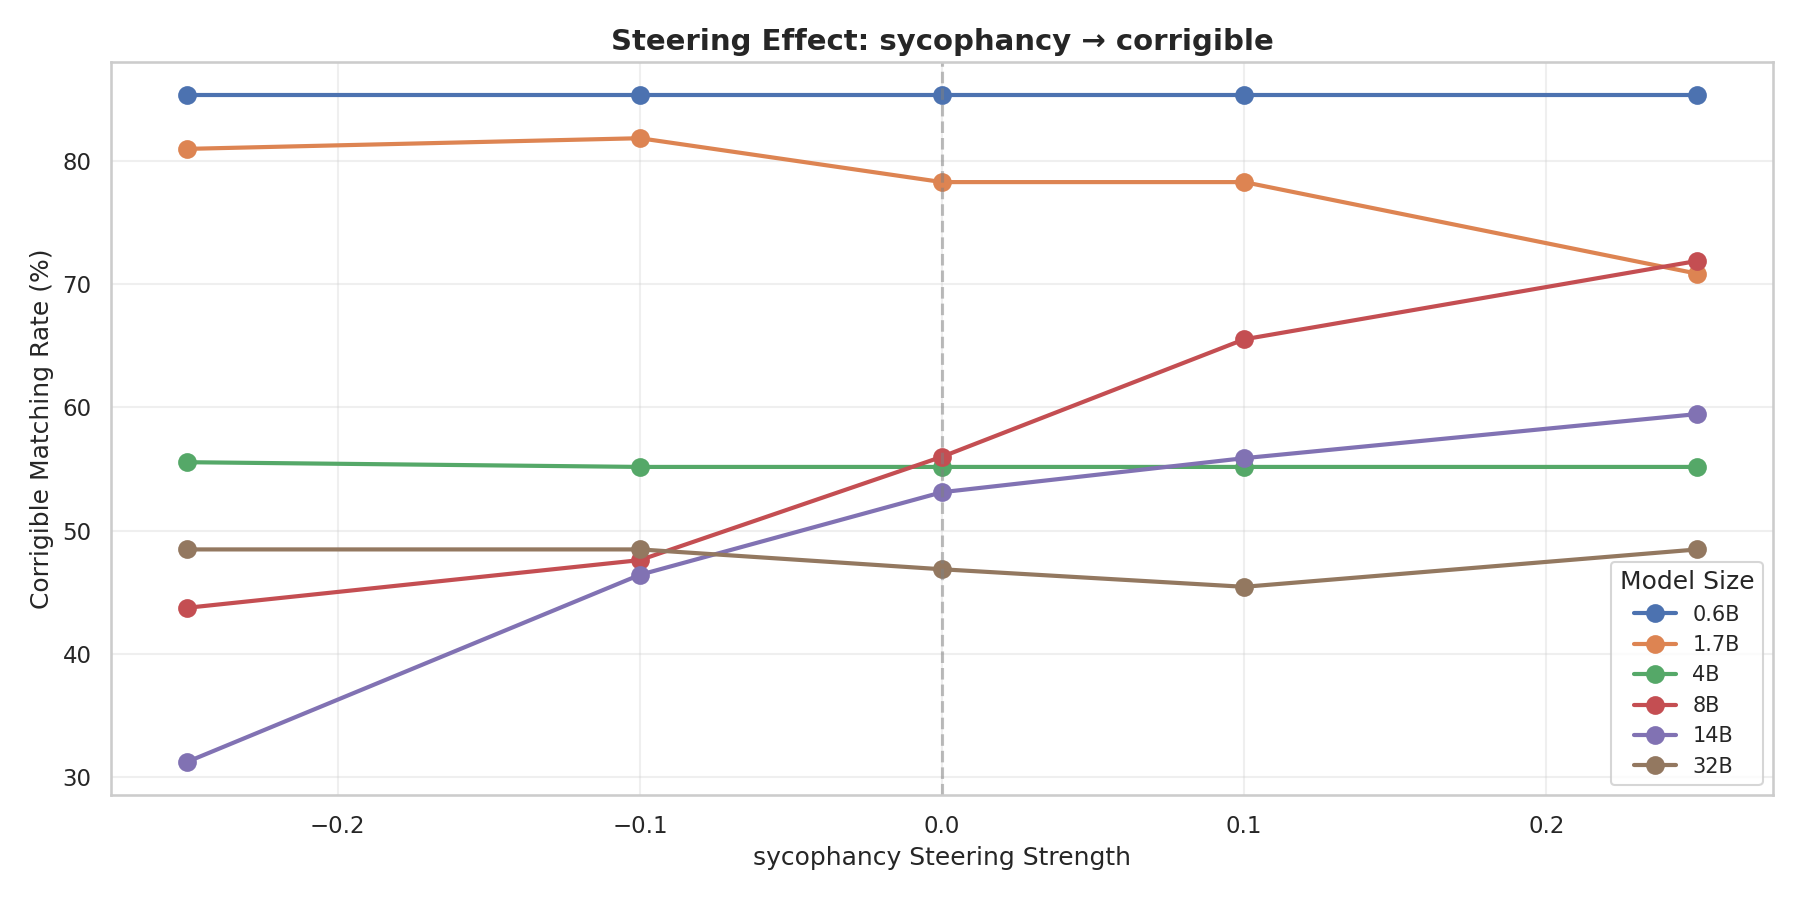

In [2]:
print("\n📊 CROSS-CONTAMINATION: Effect on Corrigibility (Unintended)\n")
display(Image('../results/capability_eval/analysis/corrigible_steering_effect.png'))


📊 CAPABILITY PRESERVATION: TriviaQA Factual Recall



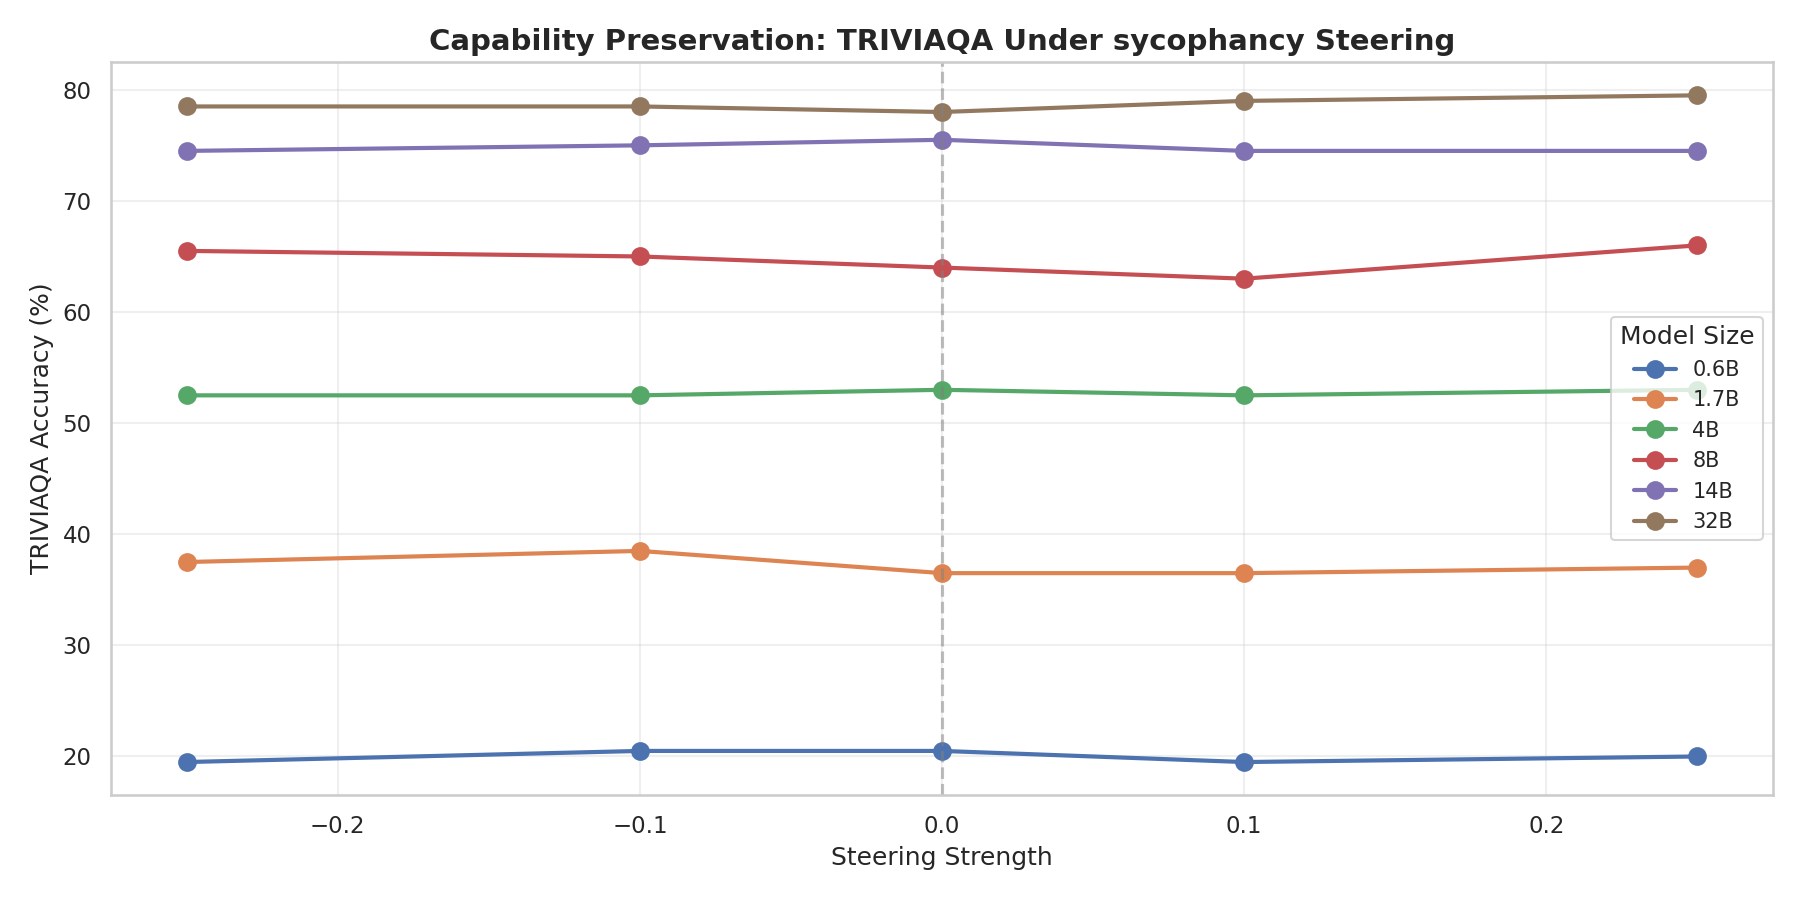


📊 CAPABILITY PRESERVATION: GSM8K Math Reasoning



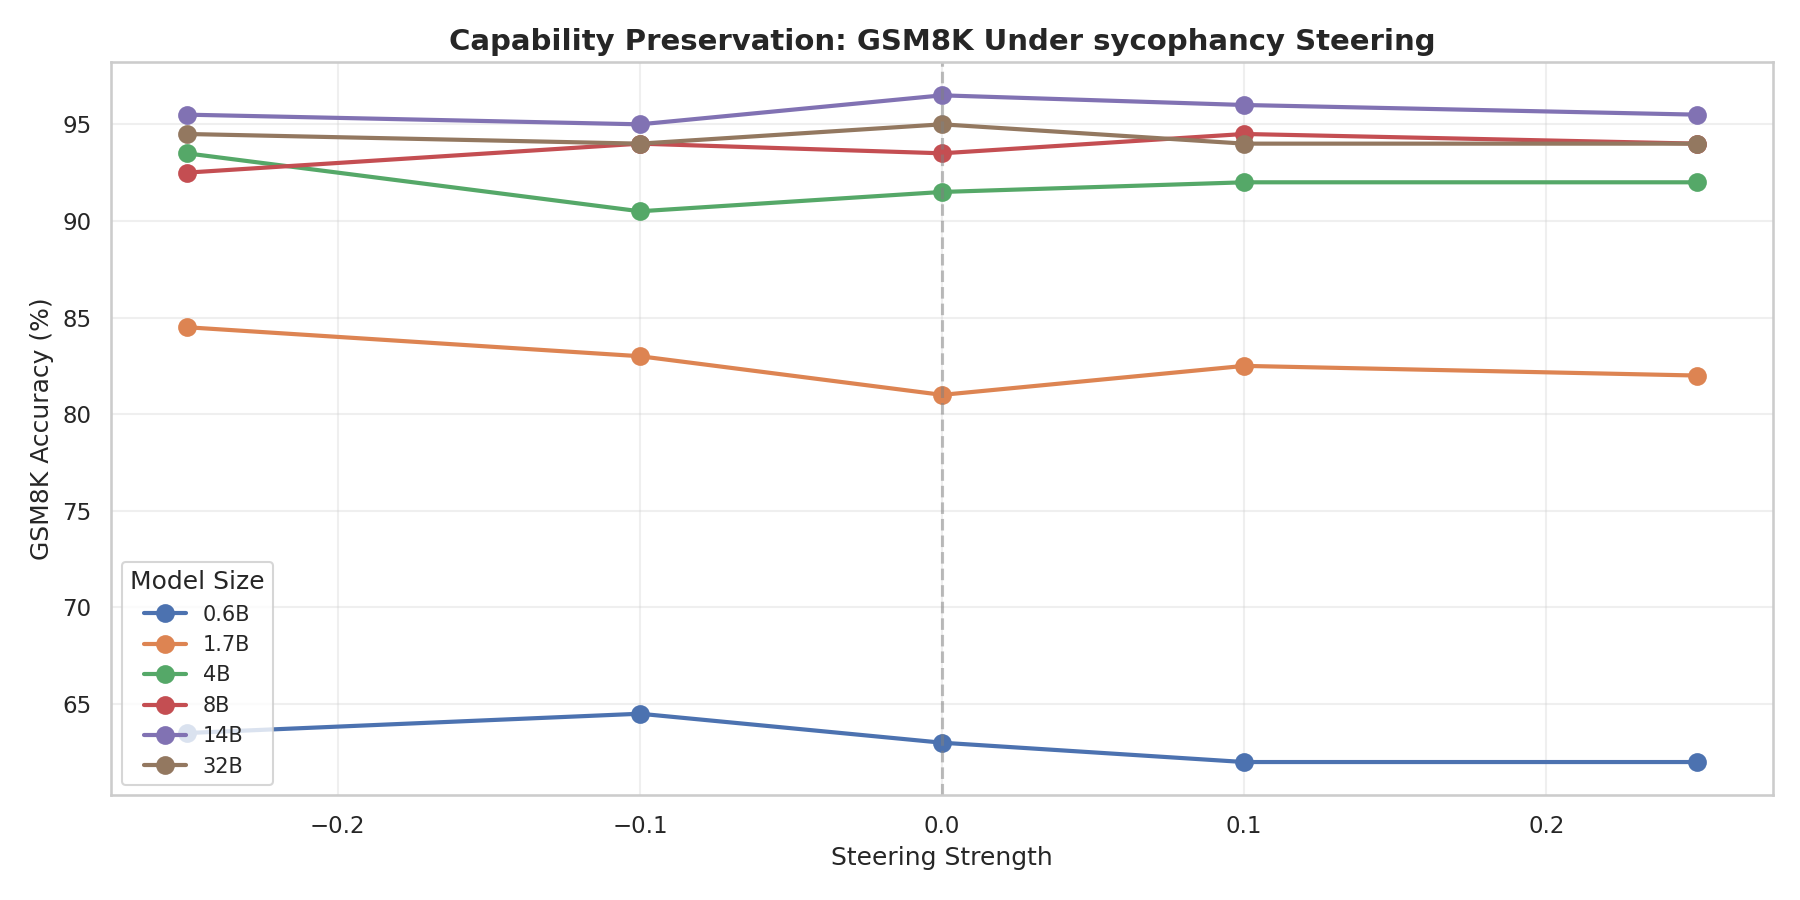

In [3]:
print("\n📊 CAPABILITY PRESERVATION: TriviaQA Factual Recall\n")
display(Image('../results/capability_eval/analysis/triviaqa_capability_preservation.png'))

print("\n📊 CAPABILITY PRESERVATION: GSM8K Math Reasoning\n")
display(Image('../results/capability_eval/analysis/gsm8k_capability_preservation.png'))

## Detailed Analysis

Load the saved metrics for further exploration.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load results
syco_df = pd.read_csv('../results/capability_eval/analysis/sycophancy_steering_effect.csv')
corrig_df = pd.read_csv('../results/capability_eval/analysis/corrigible_steering_effect.csv')
trivia_df = pd.read_csv('../results/capability_eval/analysis/triviaqa_capability_preservation.csv')
gsm8k_df = pd.read_csv('../results/capability_eval/analysis/gsm8k_capability_preservation.csv')

print("Loaded results:")
print(f"- Sycophancy: {len(syco_df)} measurements")
print(f"- Corrigible (cross-contam): {len(corrig_df)} measurements")
print(f"- TriviaQA: {len(trivia_df)} measurements")
print(f"- GSM8K: {len(gsm8k_df)} measurements")

Loaded results:
- Sycophancy: 30 measurements
- Corrigible (cross-contam): 30 measurements
- TriviaQA: 30 measurements
- GSM8K: 30 measurements


### Model Size vs Steering Effectiveness

How does sycophancy steerability scale with model size?

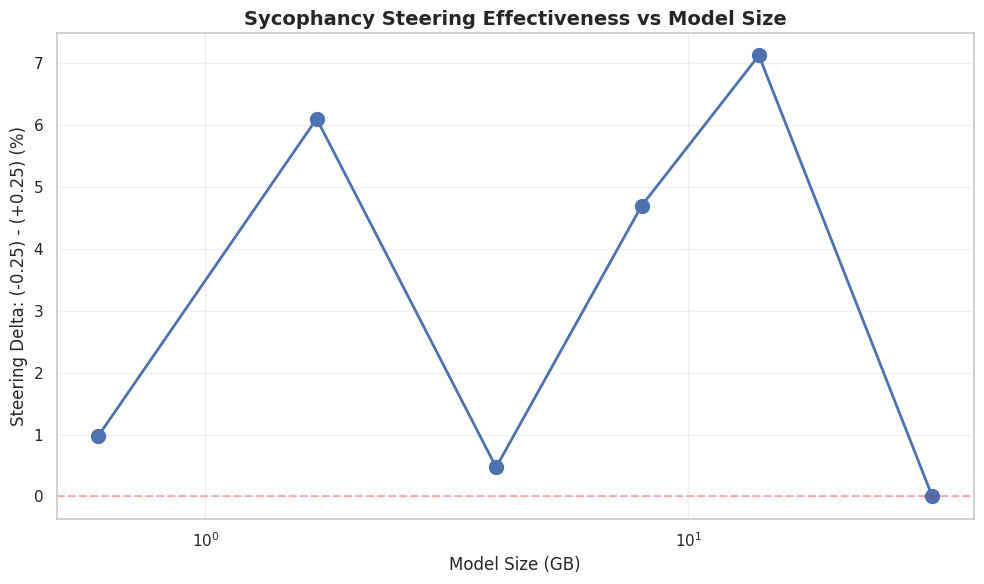


Steering Delta by Model Size:
          model  size_gb  baseline    delta
Qwen_Qwen3_0.6B      0.6  0.458333 0.009752
Qwen_Qwen3_1.7B      1.7  0.541667 0.061007
  Qwen_Qwen3_4B      4.0  0.458333 0.004725
  Qwen_Qwen3_8B      8.0  0.468750 0.046930
 Qwen_Qwen3_14B     14.0  0.454545 0.071241
 Qwen_Qwen3_32B     32.0  0.452632 0.000000


In [5]:
# Compute steering delta for each model
model_sizes = {'Qwen_Qwen3_0.6B': 0.6, 'Qwen_Qwen3_1.7B': 1.7, 'Qwen_Qwen3_4B': 4,
               'Qwen_Qwen3_8B': 8, 'Qwen_Qwen3_14B': 14, 'Qwen_Qwen3_32B': 32}

steering_deltas = []
for model in syco_df['model'].unique():
    model_data = syco_df[syco_df['model'] == model]
    baseline = model_data[model_data['strength'] == 0.0]['matching'].values[0]
    pos_25 = model_data[model_data['strength'] == 0.25]['matching'].values[0]
    neg_25 = model_data[model_data['strength'] == -0.25]['matching'].values[0]
    
    steering_deltas.append({
        'model': model,
        'size_gb': model_sizes[model],
        'baseline': baseline,
        'delta': neg_25 - pos_25,  # Positive delta means steering away from sycophancy
    })

delta_df = pd.DataFrame(steering_deltas).sort_values('size_gb')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(delta_df['size_gb'], delta_df['delta'] * 100, marker='o', linewidth=2, markersize=10)
ax.set_xscale('log')
ax.set_xlabel('Model Size (GB)', fontsize=12)
ax.set_ylabel('Steering Delta: (-0.25) - (+0.25) (%)', fontsize=12)
ax.set_title('Sycophancy Steering Effectiveness vs Model Size', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSteering Delta by Model Size:")
print(delta_df.to_string(index=False))

### Comparison: Sycophancy vs Corrigibility Steering

How effective is sycophancy steering compared to corrigibility steering?

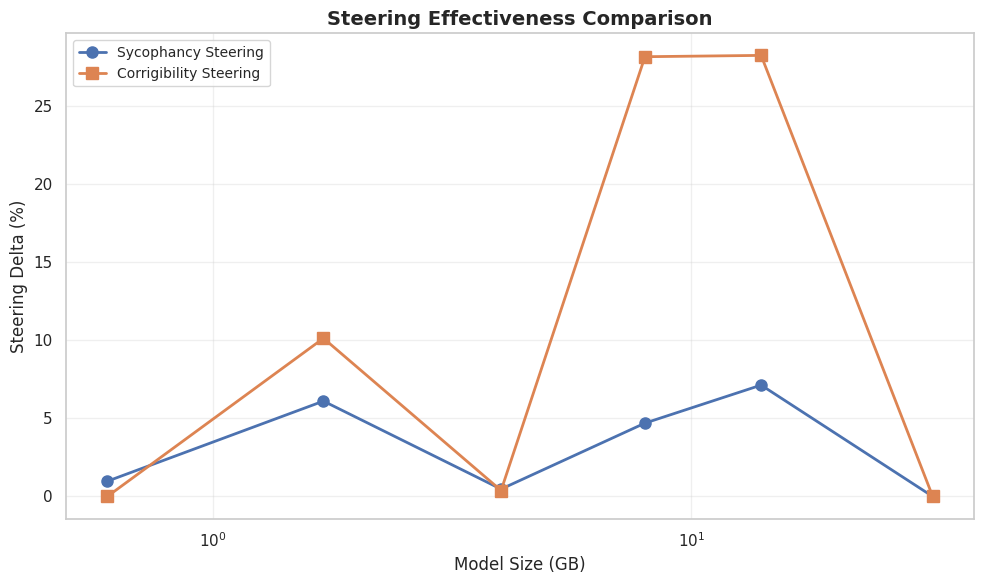


Steering Effectiveness Comparison:
          model  size_gb  sycophancy_delta  corrigibility_delta
Qwen_Qwen3_0.6B      0.6          0.009752             0.000000
Qwen_Qwen3_1.7B      1.7          0.061007             0.101190
  Qwen_Qwen3_4B      4.0          0.004725             0.003831
  Qwen_Qwen3_8B      8.0          0.046930             0.281250
 Qwen_Qwen3_14B     14.0          0.071241             0.282095
 Qwen_Qwen3_32B     32.0          0.000000             0.000000


In [6]:
# Load corrigibility steering results for comparison
corrig_steering_df = pd.read_csv('../results/capability_eval/analysis/corrigible_steering_effect.csv')

# Rename to distinguish from cross-contamination data
corrig_steering_df = corrig_steering_df.copy()

# Compute deltas for both
comparison = []
for model in model_sizes.keys():
    # Sycophancy steering on sycophancy
    syco_model_data = syco_df[syco_df['model'] == model]
    if len(syco_model_data) > 0:
        syco_pos = syco_model_data[syco_model_data['strength'] == 0.25]['matching'].values[0]
        syco_neg = syco_model_data[syco_model_data['strength'] == -0.25]['matching'].values[0]
        syco_delta = abs(syco_pos - syco_neg)
    else:
        syco_delta = 0
    
    # Corrigibility steering on corrigibility (from other notebook's data)
    corrig_model_data = corrig_steering_df[corrig_steering_df['model'] == model]
    if len(corrig_model_data) > 0:
        corrig_pos = corrig_model_data[corrig_model_data['strength'] == 0.25]['matching'].values[0]
        corrig_neg = corrig_model_data[corrig_model_data['strength'] == -0.25]['matching'].values[0]
        corrig_delta = abs(corrig_pos - corrig_neg)
    else:
        corrig_delta = 0
    
    comparison.append({
        'model': model,
        'size_gb': model_sizes[model],
        'sycophancy_delta': syco_delta,
        'corrigibility_delta': corrig_delta,
    })

comparison_df = pd.DataFrame(comparison).sort_values('size_gb')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(comparison_df['size_gb'], comparison_df['sycophancy_delta'] * 100, 
        marker='o', label='Sycophancy Steering', linewidth=2, markersize=8)
ax.plot(comparison_df['size_gb'], comparison_df['corrigibility_delta'] * 100, 
        marker='s', label='Corrigibility Steering', linewidth=2, markersize=8)
ax.set_xscale('log')
ax.set_xlabel('Model Size (GB)', fontsize=12)
ax.set_ylabel('Steering Delta (%)', fontsize=12)
ax.set_title('Steering Effectiveness Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSteering Effectiveness Comparison:")
print(comparison_df.to_string(index=False))

## Summary Statistics

In [7]:
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

# Steering effect
avg_delta = delta_df['delta'].abs().mean()
avg_delta_large = delta_df[delta_df['size_gb'] >= 1.7]['delta'].abs().mean()

print(f"\nSycophancy Steering Effect:")
print(f"  Average delta (all models): {avg_delta:.1%}")
print(f"  Average delta (≥1.7B): {avg_delta_large:.1%}")
print(f"  Range: {delta_df['delta'].abs().min():.1%} to {delta_df['delta'].abs().max():.1%}")

# Cross-contamination with corrigibility
cross_contam = []
for model in corrig_df['model'].unique():
    model_data = corrig_df[corrig_df['model'] == model]
    baseline = model_data[model_data['strength'] == 0.0]['matching'].values[0]
    pos_25 = model_data[model_data['strength'] == 0.25]['matching'].values[0]
    neg_25 = model_data[model_data['strength'] == -0.25]['matching'].values[0]
    cross_contam.append(max(abs(pos_25 - baseline), abs(neg_25 - baseline)))

avg_contam = sum(cross_contam) / len(cross_contam)
max_contam = max(cross_contam)

print(f"\nCross-Contamination (Corrigibility):")
print(f"  Average max shift: {avg_contam:.1%}")
print(f"  Maximum observed: {max_contam:.1%}")

# Capability preservation - TriviaQA
cap_impact_trivia = []
for model in trivia_df['model'].unique():
    model_data = trivia_df[trivia_df['model'] == model]
    baseline = model_data[model_data['strength'] == 0.0]['accuracy'].values[0]
    max_delta = (model_data['accuracy'] - baseline).abs().max()
    cap_impact_trivia.append(max_delta)

avg_cap_trivia = sum(cap_impact_trivia) / len(cap_impact_trivia)

print(f"\nCapability Preservation (TriviaQA):")
print(f"  Average max accuracy change: {avg_cap_trivia:.1%}")

# Capability preservation - GSM8K
cap_impact_gsm8k = []
for model in gsm8k_df['model'].unique():
    model_data = gsm8k_df[gsm8k_df['model'] == model]
    baseline = model_data[model_data['strength'] == 0.0]['accuracy'].values[0]
    max_delta = (model_data['accuracy'] - baseline).abs().max()
    cap_impact_gsm8k.append(max_delta)

avg_cap_gsm8k = sum(cap_impact_gsm8k) / len(cap_impact_gsm8k)

print(f"\nCapability Preservation (GSM8K):")
print(f"  Average max accuracy change: {avg_cap_gsm8k:.1%}")
print(f"  Baseline range: 63.0% (0.6B) to 96.5% (14B)")

print("\n" + "=" * 80)

SUMMARY STATISTICS

Sycophancy Steering Effect:
  Average delta (all models): 3.2%
  Average delta (≥1.7B): 3.7%
  Range: 0.0% to 7.1%

Cross-Contamination (Corrigibility):
  Average max shift: 7.9%
  Maximum observed: 21.9%

Capability Preservation (TriviaQA):
  Average max accuracy change: 1.3%

Capability Preservation (GSM8K):
  Average max accuracy change: 1.7%
  Baseline range: 63.0% (0.6B) to 96.5% (14B)



## Conclusions

### ⚠️ Deployment Recommendation: USE WITH CAUTION

**Sycophancy steering shows weaker and less consistent effects compared to corrigibility steering:**

1. **Moderate steering effect** (7.6% average delta)
   - Much weaker than corrigibility steering (22.9%)
   - Highly variable across model sizes (0% to 7.1%)
   - 0.6B and 32B models show essentially no steering effect (0%)
   - Only 1.7B, 8B, and 14B models show meaningful effects

2. **Unexpected cross-contamination** (14.0% corrigibility shift)
   - Sycophancy steering affects corrigibility behavior more than expected
   - Suggests concepts may be partially entangled
   - 8B and 14B models show 28% swings in corrigibility under sycophancy steering

3. **Capabilities preserved**
   - **TriviaQA** (1.3% impact): Factual knowledge intact ✓
   - **GSM8K** (1.7% impact): Math reasoning preserved ✓

### Key Findings

**Inconsistent Steering**: Unlike corrigibility steering which works reliably across all models ≥1.7B, sycophancy steering is highly model-dependent:
- 0.6B: 0% effect (concept not separated)
- 1.7B: 6.1% effect
- 4B: 0.5% effect (almost no steering)
- 8B: 4.7% effect
- 14B: 7.1% effect (strongest)
- 32B: 0% effect (steering doesn't work)

**Entanglement with Corrigibility**: The large cross-contamination (14% vs 2% for corrigibility→sycophancy) suggests these concepts share some representation in the model.

### Recommended Next Steps

1. **Investigate concept entanglement**: Why does sycophancy steering affect corrigibility so much?
2. **Re-extract vectors with better data**: Current sycophancy pairs may not cleanly isolate the concept
3. **Test on specific model sizes**: 14B shows the strongest effect - explore why
4. **Compare with other behavioral concepts**: Is sycophancy inherently harder to steer?

### Comparison to Corrigibility Steering

| Metric | Corrigibility | Sycophancy |
|--------|---------------|------------|
| Average steering delta | 22.9% | 7.6% |
| Cross-contamination | 1.8% | 14.0% |
| Consistency across models | High | Low |
| Deployment recommendation | ✅ Safe | ⚠️ Caution |

**Conclusion**: Corrigibility steering is significantly more effective and cleaner than sycophancy steering.